### 비즈니스 미디어 통신 HW3 Solution - 20193019 강태영

이번 HW3의 DPC(Distributed Power Control) 문제는 각 **player**인 스마트폰이 "power level을 어떻게 설정할 것인가"에 대한 **strategic choice**를 다루고 있다. 이 때의 **payoff**는 목표 SIR 값($\gamma$)을 만족하는 조건 하에서의 power 최소값이다. 또한, 후술할 SIR의 계산식과 non-identity gain matrix($G$)에서 볼 수 있듯 각 player의 strategy는 다른 player의 power에 dependent한 상황이다. 즉, 한 player의 transmit power 증가가 곧 다른 player에게의 interference로 작용하기에, 각 player들은 이를 감안하여 equillibrium에 도달해야 한다. 따라서,  DPC는 전략적 의사결정이 수반되는 게임 상황이라고 해석 가능하다.

본 문제의 SIR 및 Power(P) 계산식을 일반화해서 작성하면 아래와 같다.  
$P_i[t+1] = \frac{\gamma_j}{SIR_i[t]}P_i[t]$$\;\;\;$($i = \{A,B,C\}$ and $j = \{a,b,c\}$)  

따라서 Power가 t 시점에서 특정 값으로 수렴한다고 가정한다면 $P_i[t+1] = P_i[t]$일 것이고, 결과적으로  $\frac{\gamma_j}{SIR_i[t]}$는 1이어야 한다. 즉, $\gamma_j = SIR_i[t]$  이다. 이를 바탕으로 각 A, B, C에 대해 계산 식을 정리하면, 다음 연립방정식 형태로 도출된다.  
$22b+11c+11=50a$  
$3a+3c+1=5b$  
$34a+17b+17=100c$  
  
연립방정식의 해, 즉 Power의 수렴값을 계산하면 결과는 다음과 같다

In [1]:
# Calculating Convergence Value of Power by Simultaneous Equations
import sys, math, numpy as np, pandas as pd, matplotlib.pyplot as plt
from sympy import Symbol, solve, Eq

a, b, c = Symbol('a'), Symbol('b'), Symbol('c')
e1 = Eq(22*b + 11*c +11, 50*a)
e2 = Eq(3*a + 3*c + 1, 5*b)
e3 = Eq(34*a + 17*b + 17, 100*c)
eq_output = solve([e1, e2, e3], a, b, c, rational=False)
print(eq_output)

Power_A_conv = np.round(float(list(eq_output.values())[0]),5)
Power_B_conv = np.round(float(list(eq_output.values())[1]),5)
Power_C_conv = np.round(float(list(eq_output.values())[2]),5)

{a: 9383/11175, b: 4053/3725, c: 7157/11175}


아래의 SIR 계산식에 대해 150회 iteration 결과를 구현하면, SIR는 target value인 2.2, 2.0, 1.7로, Power Level은 위에서 계산한 9383/11175, 4053/3725, 7157/11175로 수렴해야 한다. 계산 코드는 바로 아래의 셀[2]에서 구현했다.  
  
$SIR_A = \frac{A_a*Power_A}{A_b*Power_B+A_c*Power_C+noise}$  
  
$SIR_B = \frac{B_b*Power_B}{B_a*Power_B+A_c*Power_C+noise}$  
  
$SIR_C = \frac{C_c*Power_C}{C_a*Power_B+A_c*Power_C+noise}$  

In [2]:
# 150 times iteration for SIR and Power Level convergence
final_SIR, final_Power = ([] for i in range(2))
A, B, C, SIR, Power, r = ({} for i in range(6))

noise = .1
r['a'], r['b'], r['c'] = 2.2, 2, 1.7
Power['A'], Power['B'], Power['C'] = 1, 1, 1 #initial power level
A['a'], A['b'], A['c'] = 1, .2, .1
B['a'], B['b'], B['c'] = .3, 1, .3
C['a'], C['b'], C['c'] = .2, .1, 1

for i in range(150) :  
    SIR['A'] = A['a']*Power['A']/(A['b']*Power['B'] + A['c']*Power['C'] + noise)
    SIR['B'] = B['b']*Power['B']/(B['a']*Power['A'] + B['c']*Power['C'] + noise)
    SIR['C'] = C['c']*Power['C']/(C['a']*Power['A'] + C['b']*Power['B'] + noise)

    Power['A'] = r['a']*Power['A'] / SIR['A']
    Power['B'] = r['b']*Power['B'] / SIR['B']
    Power['C'] = r['c']*Power['C'] / SIR['C']
    
    SIR_result = [SIR['A'], SIR['B'], SIR['C']]
    Power_result = [Power['A'], Power['B'], Power['C']]
    final_SIR.append(SIR_result)
    final_Power.append(Power_result)

The final values of SIR are [2.2 2.  1.7]
The final values of Power level are [0.83964 1.08805 0.64045]


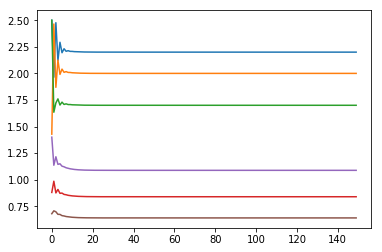

In [3]:
# Simulation Output Visualization
plt.plot(final_SIR); plt.plot(final_Power)
print('The final values of SIR are', np.round(final_SIR[len(final_SIR)-1], 5))
print('The final values of Power level are', np.round(final_Power[len(final_Power)-1],5))

150회 iteration을 실시한 결과, SIR와 Power level 모두 예측값에 수렴하는 것으로 나타났다. 또한 아래의 셀[4]에서 코드를 통해 소수점 다섯번째 자리에서 반올림한 결과, Power level이  정확히 수렴값에 도달하는건 44번째 iteration부터였다.

In [4]:
for index, content in enumerate(final_Power) :
    if np.all(np.round(content, 5) == [Power_A_conv, Power_B_conv, Power_C_conv]) :
        print('Power converges since ', index, 'th value.', sep='')
        break
print('The ', index, 'th values of SIRs are ', final_SIR[index], sep='')

Power converges since 44th value.
The 44th values of SIRs are [2.200000761251543, 2.0000007305794134, 1.7000005762187906]
